In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
# now loading the iris dataset

df = datasets.load_iris()
df = pd.DataFrame(df.data, columns= df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# To find no. of rows and columns
df.shape

(150, 4)

In [4]:
# to find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# now we will find optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\SWAPNIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


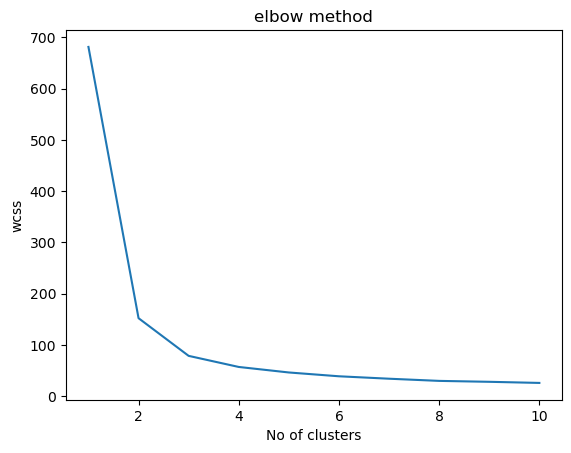

In [6]:
# Now Plotting elbow curve to find the no. of cluster
# plotting the results onto a line graph
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss') # within cluster sum of squares
plt.show()

In [7]:
# Applying K-Meansto the dataset
# Creating the K-Means classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

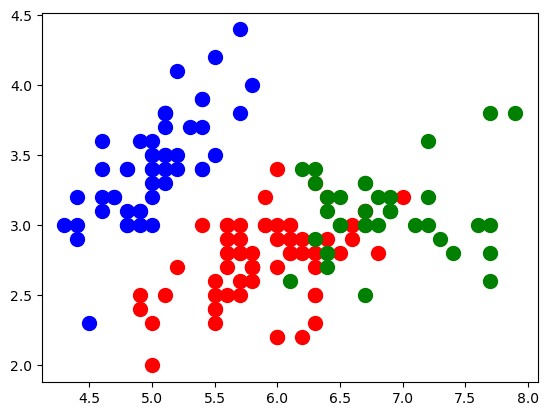

In [8]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

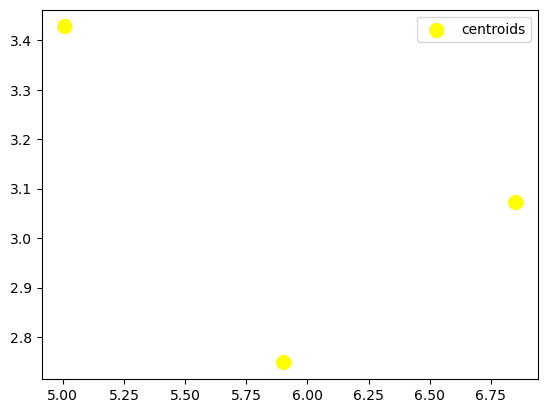

In [9]:
# now, plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label ='centroids')
plt.legend()

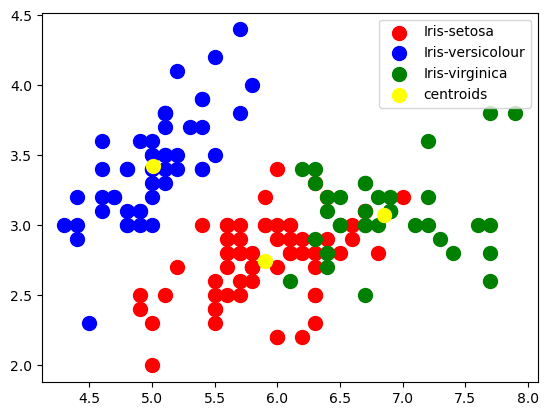

In [10]:
# Visualizing the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

#now plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label ='centroids')
plt.legend()

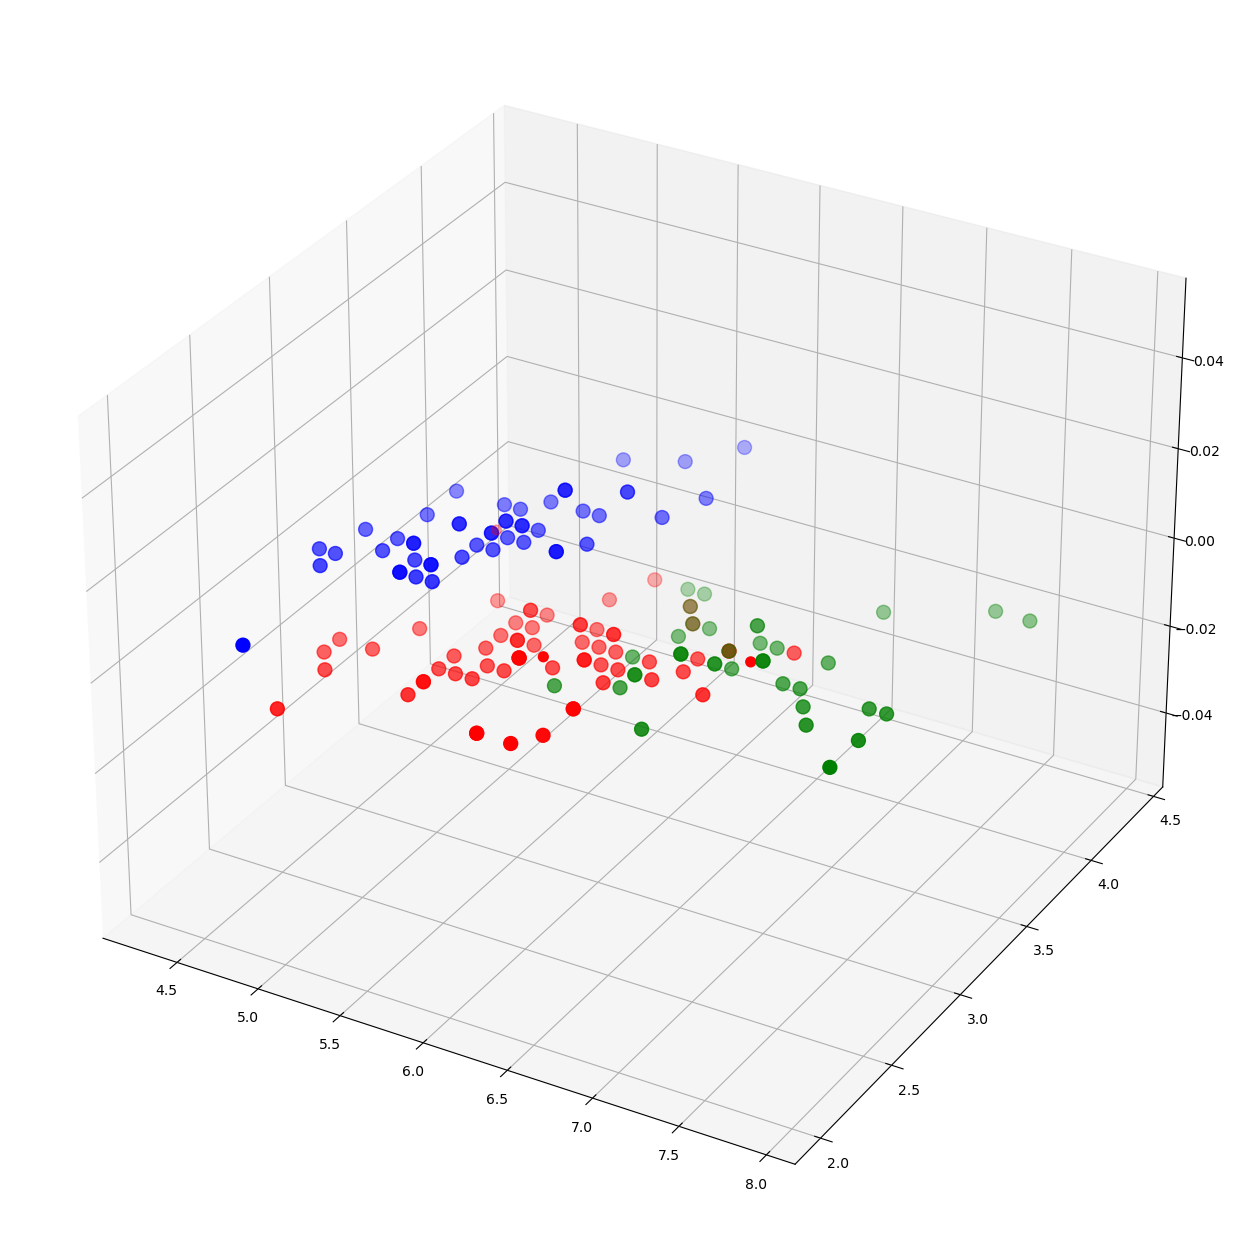

In [11]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize =(16,16))
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_[:,1], s = 50, c='red', label = 'Centroids')
plt.show()


In [12]:
data_with_clusters = df.copy()
data_with_clusters ["Clusters"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Clusters  
0         1  
1         1  
2         1  
3         1  
4         1  
